DECISION TREE REGRESSOR TO PREDICT "CALCULATE_PROBABILITY" GIVEN FEATURES “STUDENT COUNT", "TEACHER_RETURN_RATE_PROBABILITY", AND “CLASSTYPE_RETURN_PROBABILITY

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.api as sm
from sklearn import datasets, linear_model
%matplotlib inline
conn = sqlite3.connect('E:/everywhere/everywhere.db')
cur = conn.cursor()
#to begin with we shall first ascertain the number of students in the entire classes based on the StudentsBookings table
cur.execute("select * from StudentBookings;")
df= pd.read_sql_query("select * from StudentBookings; ", conn)
df.head()

,Id,_New,StudentId,ClassId,StartDate,CeaseDate,TermId,AmountCharged,NumClassesBooked,HeldDate,...,IsMakeup,IsCasual,DontRollOver,CancelReasonId,BookedDate,CancelStaffId,CancelDate,WebBooking,PAYG,TrialStatus
0,1,,65,13,2006-10-16 00:00:00,2006-12-18 00:00:00,,140.0,10,None,...,0,0,0,0,2006-10-05 14:48:40,0,None,0,0,0
1,2,,67,8,2006-10-16 00:00:00,2006-12-18 00:00:00,,140.0,10,None,...,0,0,0,0,2006-10-05 14:53:19,0,None,0,0,0
2,3,,68,5,2006-10-16 00:00:00,2006-12-18 00:00:00,,126.0,10,None,...,0,0,0,0,2006-10-05 14:57:42,0,None,0,0,0
3,4,,70,1,2006-10-16 00:00:00,2006-12-18 00:00:00,,126.0,10,None,...,0,0,0,0,2006-10-05 15:07:22,0,None,0,0,0
4,5,,71,1,2006-10-16 00:00:00,2006-12-18 00:00:00,,140.0,10,None,...,0,0,0,0,2006-10-05 15:08:14,0,None,0,0,0


In [26]:
#The next step is to count the number of students
df= pd.read_sql_query("select * from StudentLevels; ", conn)
df[["LevelDescription","StudentId",]]

,LevelDescription,StudentId
0,Level 4,65
1,Level 3,67
2,Level 1,70
3,Level 1,74
4,Level 3,87
5,Level 4,97
6,Level 4,106
7,Snappers,106
8,Snappers,110
9,Snappers,114


In [24]:
#number of entire students count
df.StudentId.nunique()

16197

In [25]:
df[["TeacherId","ClassTypeId",]]

,TeacherId,ClassTypeId
0,47,1
1,1933,1
2,1379,1
3,1379,1
4,55,1
5,1949,1
6,62,1
7,47,3
8,41,3
9,23,3


In [29]:
#We calculate the probabilities for every teacher
df.groupby('TeacherId')['ClassTypeId'].mean()

TeacherId
0          36.587883
3          16.353383
4          12.459870
6          12.140351
8         533.500000
9          10.854167
11         11.000000
13         12.835871
15          3.000000
16          3.129032
17          1.000000
18         16.166667
20         13.553398
21          6.400000
22          1.111111
23          5.173913
24          5.750000
25         11.400000
26          3.300000
27         10.932203
28          6.829457
29          8.256757
30          7.075949
31         19.500000
32          7.880000
37          3.000000
38         12.724280
41          2.800000
45         12.296928
46          3.315789
            ...     
29316    1058.000000
29351      36.000000
30448      36.000000
30449     252.000000
31620      53.000000
31685      31.000000
31700     160.040816
31701    1058.000000
31702      58.000000
31880      90.258065
31995      36.000000
39408      30.609756
39409     140.400000
39421      53.000000
39657    1058.000000
39747      35.810127
397

In [32]:
df= pd.read_sql_query("select * from ClassTypes; ", conn)
df[["ServiceId1","ExtraDescription"]]

,ServiceId1,ExtraDescription
0,6,NORMANHURST TERM LEARN TO SWIM
1,7,NORMANHURST TERM DEVELOPMENT SQUADS
2,16,NORMANHURST TERM LORETO SQUADS
3,17,NORMANHURST TERM ADULT LTS
4,104,NORMANHURST TERM PRIVATE LESSONS
5,130,THORNLEIGH ADULT SWMMING
6,7,THORNLEIGH TERM DEVELOPMENT SQUADS
7,6,THORNLEIGH TERM LEARN TO SWIM
8,6,THORNLEIGH PERPETUAL LEARN TO SWIM
9,131,THORNLEIGH PERPETUAL BABYBLISS CLASSES


In [34]:
#number of entire classes count
df.ServiceId1.nunique()

12

In [40]:
#We calculate the probabilities for all classes
df['ServiceId1'].mean()

60.611111111111114

In [41]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [53]:
#The next step is to check the length and dimensions of our dataframe
df= pd.read_sql_query("select * from ClassTypes; ", conn)
len(df.index)
df.shape

(54, 54)

In [54]:
#We then print the head of the top 5 lines of our dataframe using the head() method
df.head()

,Id,_New,Description,ExtraDescription,ServiceId1,ServiceId2,ServiceSplit1,ServiceSplit2,DefaultJoinServiceId,DefaultJoinAmount,...,SelectAllHolSquad,LinksPayStartDate,DDLastRunLinksPayDate,YMCAFamilyBenefit,AllowTrials,TrialServiceCode,TrialAmount,TrialApplyFirstClass,TrialApplyCancellation,SearchDaysAhead
0,1,,NHTLTS,NORMANHURST TERM LEARN TO SWIM,6,0,100,0,0,0,...,0,None,None,0,0,0,0,0,0,NaN
1,3,,NHTDEV,NORMANHURST TERM DEVELOPMENT SQUADS,7,0,100,0,0,0,...,0,None,None,0,0,0,0,0,0,NaN
2,4,,NHTLOR,NORMANHURST TERM LORETO SQUADS,16,0,100,0,0,0,...,0,None,None,0,0,0,0,0,0,NaN
3,5,,NHTADU,NORMANHURST TERM ADULT LTS,17,0,100,0,0,0,...,0,None,None,0,0,0,0,0,0,NaN
4,7,,NHTPRI,NORMANHURST TERM PRIVATE LESSONS,104,0,100,0,0,0,...,0,None,None,0,0,0,0,0,0,NaN


In [73]:
#Data slicing is the nex step for spliting and training set of our data 
df.loc[:,['ExtraDescription','ServiceId1']]

,ExtraDescription,ServiceId1
0,NORMANHURST TERM LEARN TO SWIM,6
1,NORMANHURST TERM DEVELOPMENT SQUADS,7
2,NORMANHURST TERM LORETO SQUADS,16
3,NORMANHURST TERM ADULT LTS,17
4,NORMANHURST TERM PRIVATE LESSONS,104
5,THORNLEIGH ADULT SWMMING,130
6,THORNLEIGH TERM DEVELOPMENT SQUADS,7
7,THORNLEIGH TERM LEARN TO SWIM,6
8,THORNLEIGH PERPETUAL LEARN TO SWIM,6
9,THORNLEIGH PERPETUAL BABYBLISS CLASSES,131


In [95]:
X = df.values[:,'4']
X

C:\Users\Thermo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([6, 7, 16, 17, 104, 130, 7, 6, 6, 131, 131, 133, 134, 134, 18, 18,
       18, 104, 17, 17, 104, 133, 104, 134, 104, 6, 18, 104, 11, 7, 6, 131,
       7, 6, 6, 104, 7, 17, 6, 7, 104, 18, 18, 7, 508, 7, 17, 134, 133, 16,
       6, 7, 104, 18], dtype=object)

In [107]:
y = df.values[:,'13']
y

C:\Users\Thermo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1], dtype=object)

In [112]:
# we then split the data into training and test set.
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
train, test = train_test_split(df, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(37,) (37,)
(17,) (17,)


In [171]:
print (X_train)

[6 6 7 7 134 134 18 18 6 104 18 133 7 6 104 133 134 133 6 17 16 11 131 7 18
 18 7 104 134 104 6 17 104 104 131 508 17]


In [172]:
print (y_train)

[0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0]


In [28]:
import sqlite3
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
conn = sqlite3.connect('E:/everywhere/everywhere.db')
df= pd.read_sql_query("select * from ClassTypes; ", conn)
features = ["ServiceId1", "DDFreqInterval"]
print("")
X = df['ServiceId1']
y = df['DDFreqInterval']

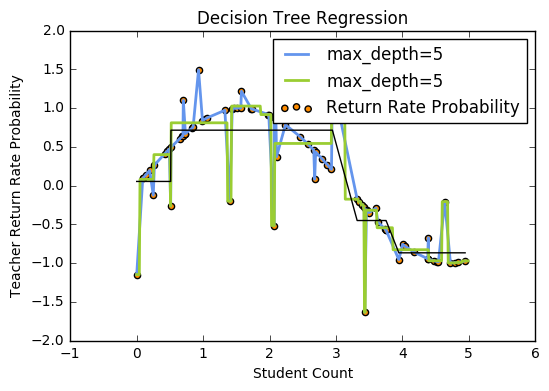

In [59]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
plt.figure()
plt.title('Decision Tree Regression')
plt.xlabel('Student Count')
plt.ylabel('Teacher Return Rate Probability')
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="Return Rate Probability")
plt.plot(X,y, color="cornflowerblue",
         label="max_depth=5", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X, regr_1.predict(X),color='k')
plt.legend()
plt.show()